<a href="https://colab.research.google.com/github/fauziass22/Flight_India/blob/main/EDA_Flight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


DATA WRANGLING

In [ ]:
fl_df=pd.read_csv("../flights.csv")
fl_df.head()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890
1,1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744
2,2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992
3,3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135
4,4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735


Assessing Data

In [ ]:
fl_df.isna().sum()

index              0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", fl_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            10683 non-null  int64 
 1   Airline          10683 non-null  object
 2   Date_of_Journey  10683 non-null  object
 3   Source           10683 non-null  object
 4   Destination      10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 834.7+ KB


CLEANING DATA

In [ ]:
fl_df.dropna(inplace=True)

In [ ]:
fl_df.drop_duplicates(inplace=True)

In [ ]:
fl_df.isna().sum()

index              0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

EDA

1. Bagaimana grafik pembelian tiket pesawat per-bulan?


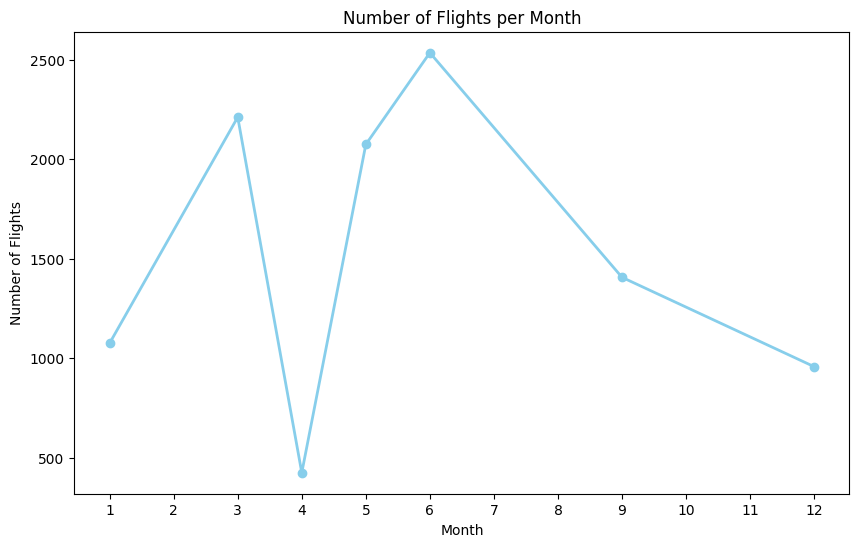

In [ ]:
fl_df['Date_of_Journey'] = pd.to_datetime(fl_df['Date_of_Journey'])
fl_df['Month'] = fl_df['Date_of_Journey'].dt.month
flights_per_month = fl_df.groupby('Month').size()

#Config Plot
plt.figure(figsize=(10, 6))
plt.plot(flights_per_month.index, flights_per_month.values, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Dari Grafik diatas, tampak pembelian terendah adalah pada bulan April dan tertinggi pada bulan Juni. Grafik penjualan dari Juni hingga desember terus menurun

<ipython-input-10-78b855d20021>:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


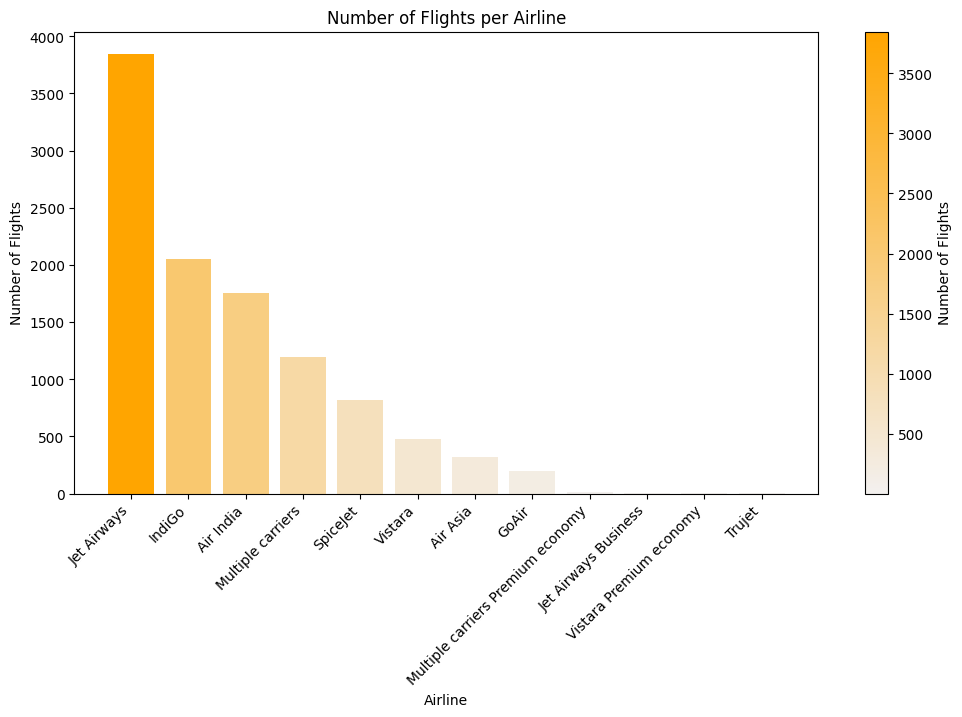

In [ ]:
plt.figure(figsize=(12, 6))
cmap = sns.light_palette("orange", as_cmap=True)
airline_counts = fl_df['Airline'].value_counts()

bars = plt.bar(airline_counts.index, airline_counts.values, color=cmap(airline_counts.values / airline_counts.max()))
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=airline_counts.min(), vmax=airline_counts.max()))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Number of Flights')

plt.show()

Airline dengan pemesan terbanyak adalah Jet Airways diikuti IndiGo dan Air India setelahnya. Trujat memiliki pemesan yang sangat sedikit

<ipython-input-11-96a1dcceacb2>:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


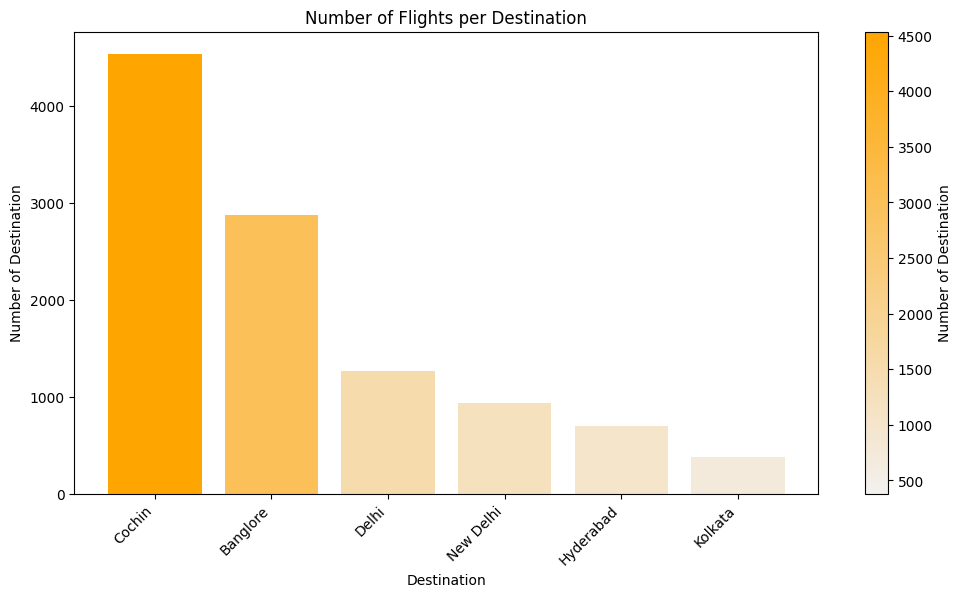

In [ ]:
plt.figure(figsize=(12, 6))
cmap = sns.light_palette("orange", as_cmap=True)
airline_counts = fl_df['Destination'].value_counts()

bars = plt.bar(airline_counts.index, airline_counts.values, color=cmap(airline_counts.values / airline_counts.max()))
plt.title('Number of Flights per Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Destination')
plt.xticks(rotation=45, ha='right')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=airline_counts.min(), vmax=airline_counts.max()))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Number of Destination')

plt.show()

Destinasi terbanyak yang dikunjungi adalah Chocin, diikuti Banglore dan Delhi. Kolkata berada di urutan terakhir.

<ipython-input-12-304becfabea4>:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


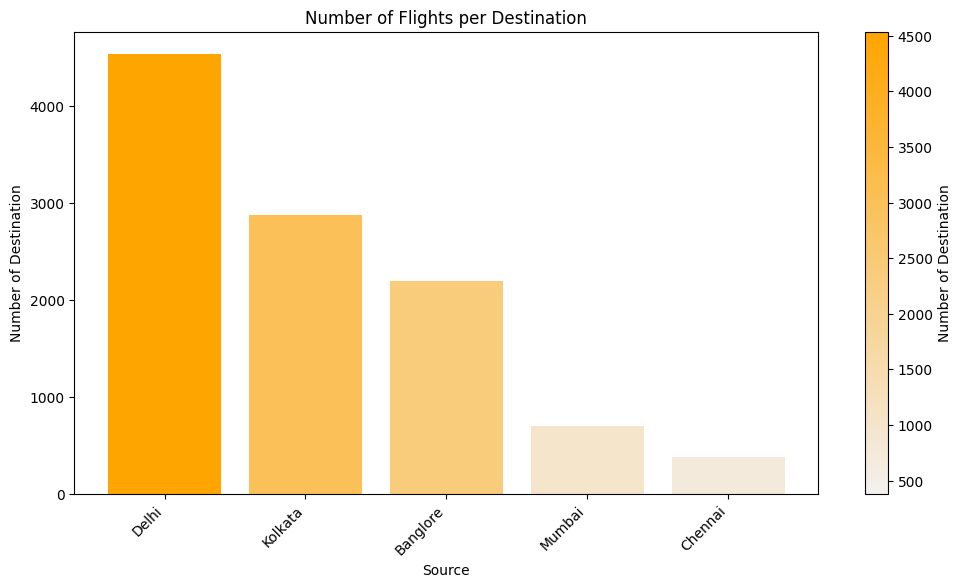

In [ ]:
plt.figure(figsize=(12, 6))

cmap = sns.light_palette("orange", as_cmap=True)
airline_counts = fl_df['Source'].value_counts()

bars = plt.bar(airline_counts.index, airline_counts.values, color=cmap(airline_counts.values / airline_counts.max()))
plt.title('Number of Flights per Destination')
plt.xlabel('Source')
plt.ylabel('Number of Destination')
plt.xticks(rotation=45, ha='right')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=airline_counts.min(), vmax=airline_counts.max()))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Number of Destination')

plt.show()

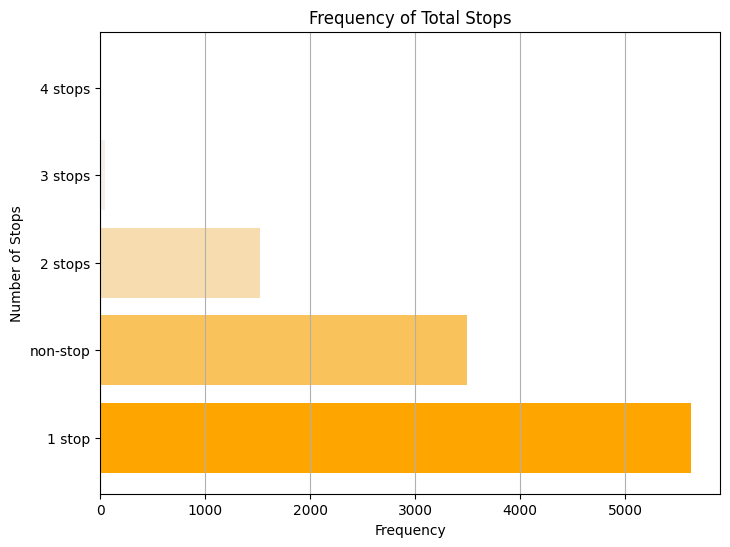

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
total_stops = fl_df["Total_Stops"].value_counts()

cmap = sns.light_palette("orange", as_cmap=True)
bars = ax.barh(total_stops.index, total_stops.values, color=cmap(total_stops.values / total_stops.max()))
plt.xlabel("Frequency")
plt.ylabel("Number of Stops")
plt.grid(axis='x')
plt.show()

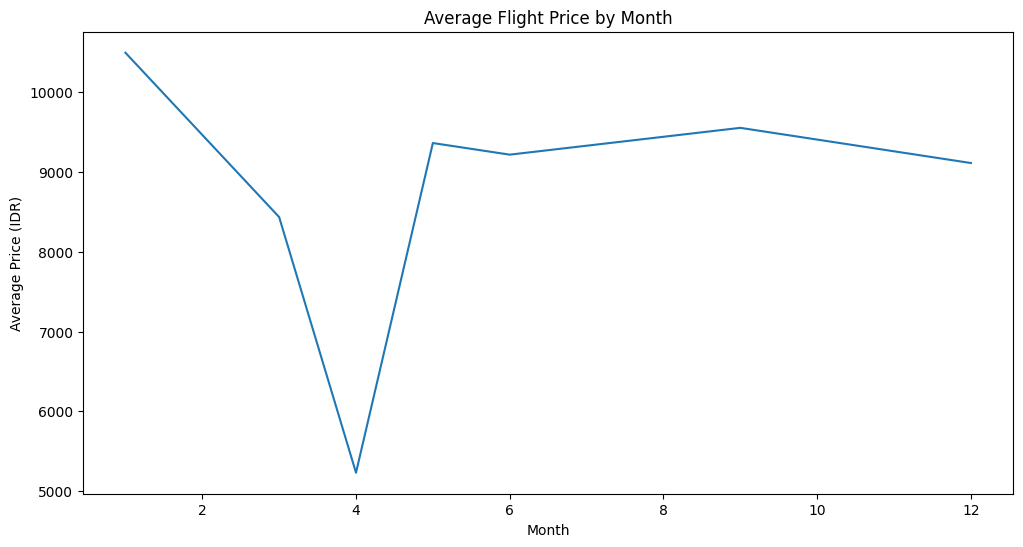

In [ ]:
monthly_prices = fl_df.groupby("Month")["Price"].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_prices.index, monthly_prices.values)
plt.xlabel("Month")
plt.ylabel("Average Price (IDR)")
plt.title("Average Flight Price by Month")
plt.show()

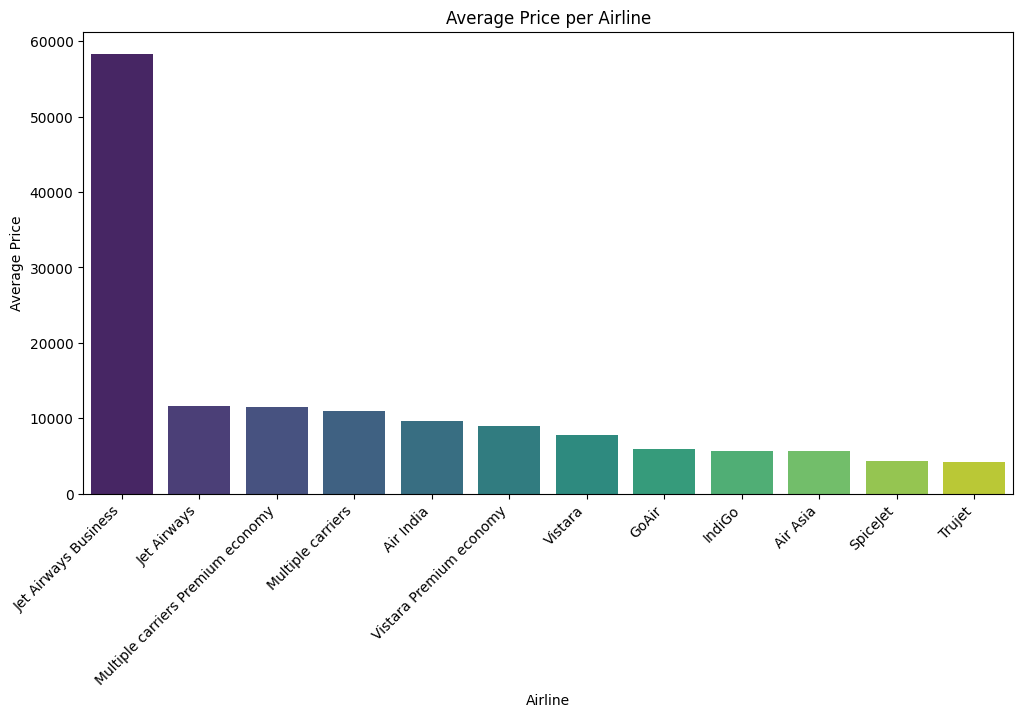

In [ ]:
average_price = fl_df.groupby('Airline')['Price'].mean()
average_price = average_price.sort_values(ascending=False)
plt.figure(figsize=(12, 6))

sns.barplot(x=average_price.index, y=average_price.values, palette='viridis')
plt.title('Average Price per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

plt.show()

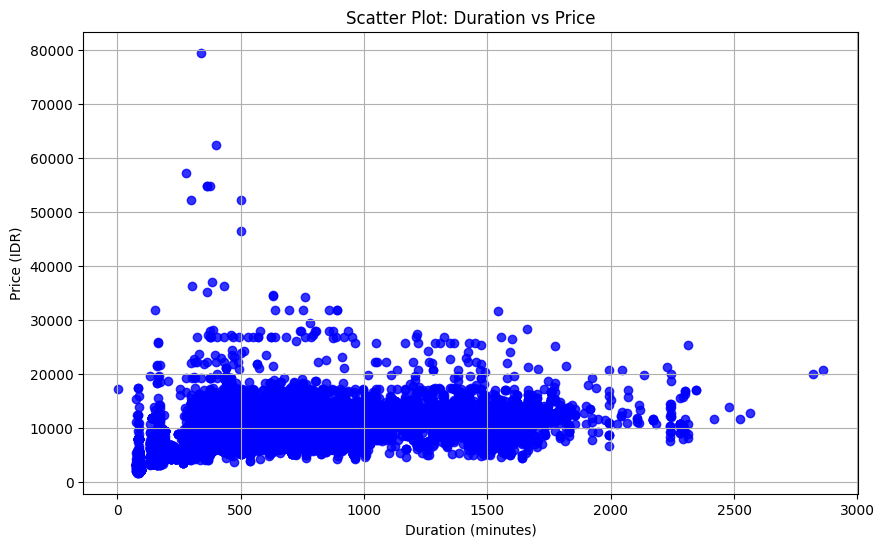

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(fl_df['Duration'], fl_df['Price'], alpha=0.8, color='blue')
plt.title('Scatter Plot: Duration vs Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price (IDR)')
plt.grid(True)
plt.show()

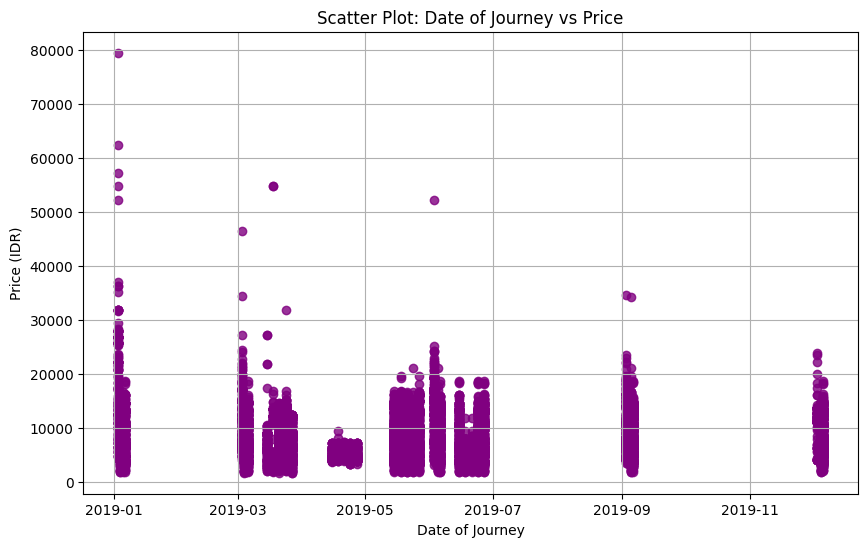

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(fl_df['Date_of_Journey'], fl_df['Price'], alpha=0.8, color='purple')
plt.title('Scatter Plot: Date of Journey vs Price')
plt.xlabel('Date of Journey')
plt.ylabel('Price (IDR)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder


# Preprocessing data
# Contoh: Encoding kolom kategorikal 'Airline', 'Source', 'Destination', dan 'Additional_Info'
label_encoder = LabelEncoder()
fl_df['Airline'] = label_encoder.fit_transform(fl_df['Airline'])
fl_df['Source'] = label_encoder.fit_transform(fl_df['Source'])
fl_df['Destination'] = label_encoder.fit_transform(fl_df['Destination'])
fl_df['Additional_Info'] = label_encoder.fit_transform(fl_df['Additional_Info'])

# Handling kolom 'Total_Stops'
# Anda dapat melakukan encoding berdasarkan jumlah stop atau mengonversi menjadi numerik, sesuai kebutuhan
# Di sini saya menggantinya dengan jumlah stop (misalnya, 'non-stop' menjadi 0, '1 stop' menjadi 1, dst.)
fl_df['Total_Stops'] = fl_df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Pisahkan data menjadi fitur (X) dan target (y)
X = fl_df.drop(['Price', 'Date_of_Journey', 'Dep_Time', 'Duration'], axis=1)  # Sesuaikan kolom yang ingin dihapus
y = fl_df['Price']

# Pisahkan data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = rf_model.predict(X_test)

# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 4356225.036460739
Mean Absolute Error: 1157.8619372952737


In [ ]:
from sklearn.metrics import r2_score

# Hitung R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

# Hitung RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

# Hitung MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Absolute Percentage Error: {mape:.2f}%')

# Buat dataframe untuk meringkas hasil evaluasi
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R-squared', 'RMSE', 'MAPE'],
    'Value': [mse, mae, r2, rmse, mape]
})

print(metrics_df.to_string(index=False))